In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [52]:
df = pd.read_csv('titanic-passengers.csv', sep = ';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df["Cabin"].fillna(df["Cabin"].value_counts().index[0], inplace = True )

In [56]:
df["Embarked"].fillna(df["Embarked"].value_counts().index[0], inplace  =True)

In [57]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

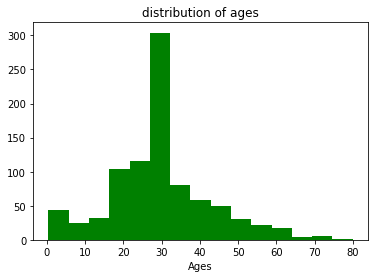

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("distribution of ages")
plt.xlabel("Ages")
plt.hist(df["Age"], bins = 15 , rwidth= 1, color= 'g')
plt.show()


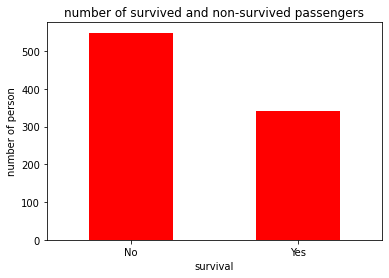

In [59]:
plt.xlabel("survival")
plt.ylabel("number of person")
plt.title("number of survived and non-survived passengers")
df_new = df["Survived"].value_counts()
df_new.plot.bar(rot = 0, color= 'red')

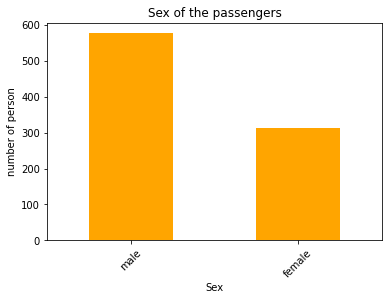

In [60]:
plt.xlabel("Sex")
plt.ylabel("number of person")
plt.title("Sex of the passengers")
df_new = df["Sex"].value_counts()
df_new.plot.bar(rot = 45,color= 'orange' )

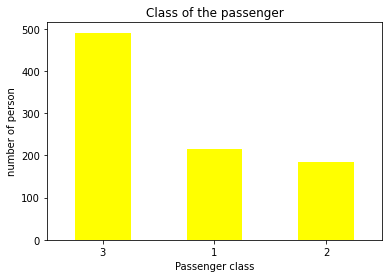

In [61]:
plt.xlabel("Passenger class")
plt.ylabel("number of person")
plt.title("Class of the passenger")
df_new = df["Pclass"].value_counts()
df_new.plot.bar(rot = 0, color= 'yellow')

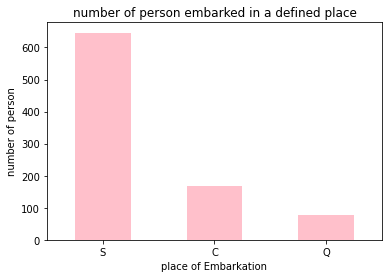

In [62]:
plt.xlabel("place of Embarkation")
plt.ylabel("number of person")
plt.title("number of person embarked in a defined place")
df_new = df["Embarked"].value_counts()
df_new.plot.bar(rot = 0, color= 'pink')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


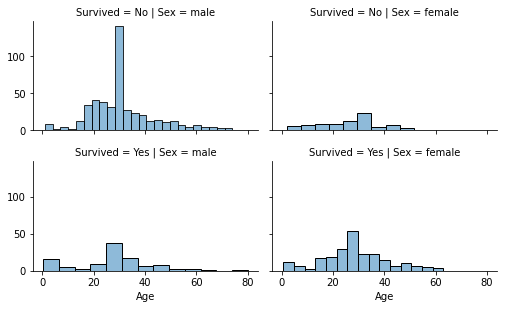

In [63]:
grid=sns.FacetGrid(df,row="Survived" , col="Sex",size=2.2, aspect=1.6)
grid.map(sns.histplot,"Age", alpha=.5)
plt.xlabel("Age")
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


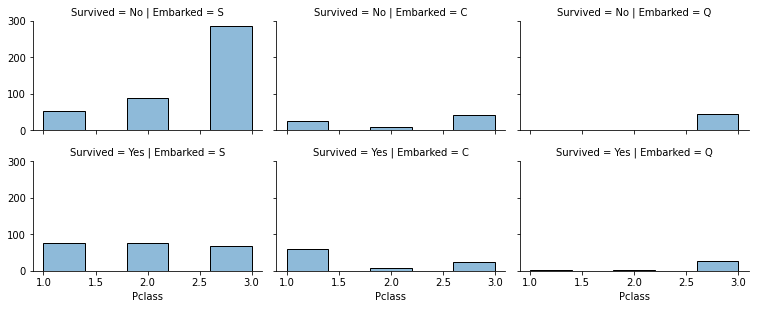

In [64]:
grid=sns.FacetGrid(df,row="Survived" , col="Embarked",size=2.2, aspect=1.6)
grid.map(sns.histplot,"Pclass", alpha=.5, bins = 5)
grid.add_legend()

In [65]:
df_new = df.drop(["PassengerId","Name","Cabin","Ticket"], axis=1)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,male,28.000000,0,0,13.0000,S
1,No,3,male,25.000000,0,0,7.6500,S
2,No,3,male,20.000000,0,0,7.8542,S
3,No,3,female,29.000000,0,4,21.0750,S
4,No,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C
887,No,3,male,22.000000,0,0,7.2292,C
888,No,3,female,30.000000,0,0,8.6625,S
889,No,3,male,29.699118,0,0,7.8958,S


In [66]:
title = []
for i in df["Name"] :
  i = i.split(',')[1].split('.')[0]
  title.append(i)
title1 = pd.Series(title, name='Title')
df1 = df_new.join(title1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.000000,0,0,13.0000,S,Mr
1,No,3,male,25.000000,0,0,7.6500,S,Mr
2,No,3,male,20.000000,0,0,7.8542,S,Mr
3,No,3,female,29.000000,0,4,21.0750,S,Mrs
4,No,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C,Mrs
887,No,3,male,22.000000,0,0,7.2292,C,Mr
888,No,3,female,30.000000,0,0,8.6625,S,Miss
889,No,3,male,29.699118,0,0,7.8958,S,Mr


In [67]:
title_dict={'Title' : 
                    {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mr",
                    "Master" :"Master" }}  
df_new = df1.replace(title_dict, regex = True)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.000000,0,0,13.0000,S,Mrs
1,No,3,male,25.000000,0,0,7.6500,S,Mrs
2,No,3,male,20.000000,0,0,7.8542,S,Mrs
3,No,3,female,29.000000,0,4,21.0750,S,Mrs
4,No,1,male,31.000000,1,0,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C,Mrs
887,No,3,male,22.000000,0,0,7.2292,C,Mrs
888,No,3,female,30.000000,0,0,8.6625,S,Miss
889,No,3,male,29.699118,0,0,7.8958,S,Mrs


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


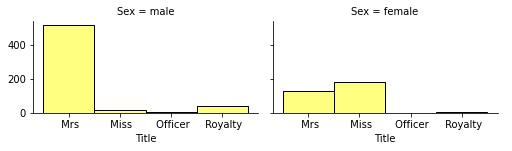

In [68]:
grid6 = sns.FacetGrid(df_new, col="Sex",size=2.2, aspect=1.6)
grid6.map(sns.histplot, 'Title', color='yellow',alpha = .5)
grid6.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


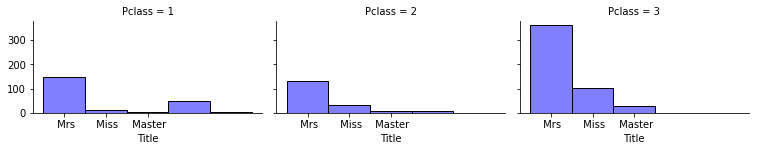

In [69]:
grid7 = sns.FacetGrid(df_new, col="Pclass",size=2.2, aspect=1.6)
grid7.map(sns.histplot, 'Title', color='blue',alpha = .5)
grid7.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


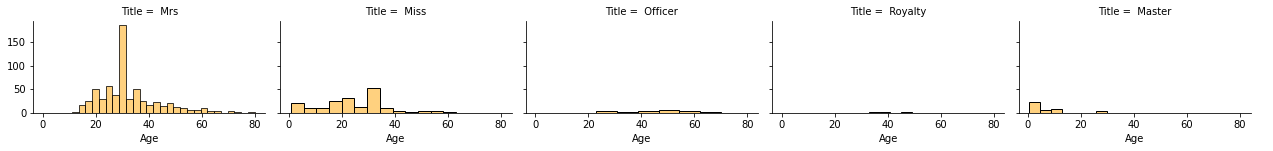

In [70]:
grid8 = sns.FacetGrid(df_new, col="Title",size=2.2, aspect=1.6)
grid8.map(sns.histplot, 'Age', color='orange',alpha = .5)
grid8.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


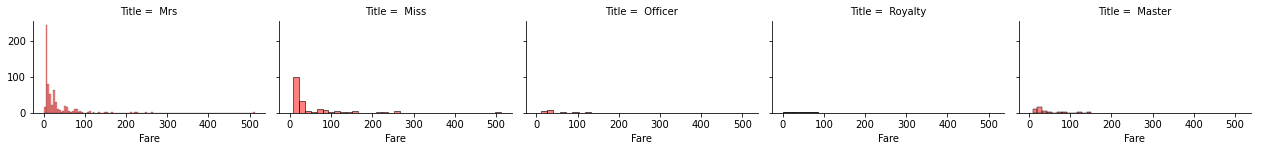

In [71]:
grid9 = sns.FacetGrid(df_new, col="Title",size=2.2, aspect=1.6)
grid9.map(sns.histplot, 'Fare', color='red',alpha = .5)
grid9.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


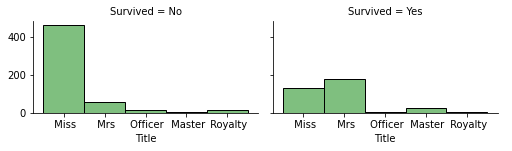

In [72]:
grid10 = sns.FacetGrid(df_new, col="Survived",size=2.2, aspect=1.6)
grid10.map(sns.histplot, 'Title', color='green',alpha = .5)
grid10.add_legend()

In [73]:
df_new = df_new.drop(["SibSp","Parch"], axis=1)
df_new

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,No,2,male,28.000000,13.0000,S,Mrs
1,No,3,male,25.000000,7.6500,S,Mrs
2,No,3,male,20.000000,7.8542,S,Mrs
3,No,3,female,29.000000,21.0750,S,Mrs
4,No,1,male,31.000000,52.0000,S,Mrs
...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,30.0708,C,Mrs
887,No,3,male,22.000000,7.2292,C,Mrs
888,No,3,female,30.000000,8.6625,S,Miss
889,No,3,male,29.699118,7.8958,S,Mrs


In [99]:
df_new['Sex']=encoder.fit_transform(df_new['Sex'])
encoder = LabelEncoder()
df_new['Embarked']=encoder.fit_transform(df_new['Embarked'])
df_new['Title']=encoder.fit_transform(df_new['Title'])
df_new['Survived']=encoder.fit_transform(df_new['Survived'])
df_new


,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,2,0,28.000000,13.0000,2,2
1,0,3,586,25.000000,7.6500,2,2
2,0,3,587,20.000000,7.8542,2,2
3,0,3,588,29.000000,21.0750,2,2
4,0,1,589,31.000000,52.0000,2,2
...,...,...,...,...,...,...,...
886,1,2,300,14.000000,30.0708,0,2
887,0,3,301,22.000000,7.2292,0,2
888,0,3,302,30.000000,8.6625,2,1
889,0,3,444,29.699118,7.8958,2,2


In [100]:
x = df_new[['Sex','Pclass','Fare','Age','Title','Embarked']]
y = df_new['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


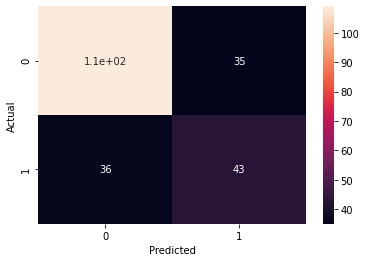

In [101]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [103]:
import sklearn.metrics as metrics
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


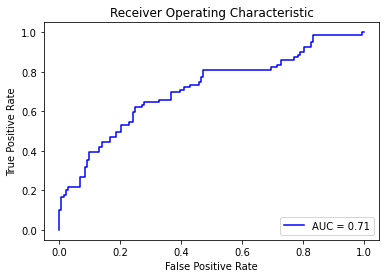

In [117]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
metrics.roc_auc_score(y_test,preds)

0.7108825597749647

Roc/Auc is a graph that shows as the accuracy of our classifcation by plotting a curve (Roc) of FPR(specificity) in fonction of the TPR (sensitivity). the more the roc curve is near the 45-degree diagonal the less accurate is our model.